In [1]:
## Load The Data
import json 
import pandas as pd
import math

raw = json.load(open('../data/without_space.json'))
for example in raw:
    for annotation in example['annotations']:
        #We expect the key of label to be label but the data has tag
        annotation['label'] = annotation['tag']
        
annotated_examples = [example for example in raw if example["annotations"] != []]
annotated_examples_ids = [example["example_id"] for example in annotated_examples]
print(len(annotated_examples))

3941


In [2]:
df_warmup_sum = pd.DataFrame(columns=range(20), index=annotated_examples_ids)
# Iterate through each example
for example_idx, example in enumerate(annotated_examples):
    annotations = example["annotations"]
    # The aggregated annotation info for an example, in the shape of [{start, end, tag, annotators:[]}, {}]
    annotation_info = []
    for annotation in annotations:
        annotation_info.append({
            "start": annotation["start"],
            "end": annotation["end"],
            "tag": annotation["tag"], 
            "user_ids": [annotator["annotator_id"] for annotator in annotation["annotated_by"]]
        })    
    # Iterate through each annotator
    for i in range(20):
        table_cell_info = []
        for annotation in annotation_info:
            if i in annotation["user_ids"]:
                table_cell_info.append({
                    "start": annotation["start"],
                    "end": annotation["end"],
                    "tag": annotation["tag"]
                })
        df_warmup_sum.loc[example["example_id"], i] = table_cell_info

In [3]:
df_warmup_sum.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
88c784a2-3682-4ff7-a625-17c6fe83e214,[],[],[],[],[],[],[],"[{'start': 79, 'end': 93, 'tag': 'Neutral'}, {...","[{'start': 5, 'end': 8, 'tag': 'Neutral'}, {'s...",[],[],[],[],[],[],"[{'start': 5, 'end': 8, 'tag': 'Neutral'}, {'s...",[],[],[],[]
5d2a9cfb-6dd6-4104-b1df-2d606f7b7c6f,[],[],[],[],[],[],[],[],[],[],[],[],"[{'start': 102, 'end': 107, 'tag': 'Positive'}...",[],"[{'start': 102, 'end': 107, 'tag': 'Positive'}...",[],"[{'start': 102, 'end': 107, 'tag': 'Positive'}...",[],[],[]
ba294f1a-60fa-4002-b4ed-57669a887fe5,[],[],[],[],[],"[{'start': 133, 'end': 144, 'tag': 'Neutral'}]",[],[],[],[],[],[],[],"[{'start': 0, 'end': 13, 'tag': 'Neutral'}, {'...","[{'start': 133, 'end': 144, 'tag': 'Neutral'}]",[],[],[],[],[]
f7e299e9-31fa-418a-b03c-9021c976ef66,[],[],[],[],[],[],"[{'start': 173, 'end': 187, 'tag': 'Negative'}...",[],[],"[{'start': 173, 'end': 187, 'tag': 'Negative'}...",[],[],[],[],[],[],"[{'start': 173, 'end': 187, 'tag': 'Negative'}...",[],[],[]
9c25cac9-905a-43c3-99b8-845b64679aee,[],[],[],[],[],[],[],"[{'start': 27, 'end': 35, 'tag': 'Neutral'}, {...",[],"[{'start': 72, 'end': 79, 'tag': 'Neutral'}, {...","[{'start': 27, 'end': 35, 'tag': 'Neutral'}, {...",[],[],[],[],[],[],[],[],[]


In [4]:
def remove_tag(cell):
    # if there is value
    return [{"start": info["start"], "end": info["end"]} for info in cell]

df_warmup_notag = df_warmup_sum.applymap(remove_tag)
df_warmup_notag.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
5bfbeebb-7e18-4758-84d6-f3fbb849b0df,[],[],[],[],[],[],[],[],[],[],[],[],"[{'start': 107, 'end': 116}, {'start': 0, 'end...","[{'start': 107, 'end': 116}, {'start': 0, 'end...","[{'start': 107, 'end': 116}, {'start': 0, 'end...",[],[],[],[],[]
790fd5a6-924e-40db-80cf-7c7d4cdba480,[],[],[],[],[],[],[],[],[],"[{'start': 24, 'end': 33}, {'start': 58, 'end'...","[{'start': 24, 'end': 33}, {'start': 58, 'end'...",[],[],[],[],"[{'start': 24, 'end': 33}, {'start': 58, 'end'...",[],[],[],[]
e09461ac-6b9f-432c-acbf-966bb5a8767a,[],[],[],[],[],[],"[{'start': 118, 'end': 133}, {'start': 3, 'end...",[],[],"[{'start': 118, 'end': 133}, {'start': 60, 'en...",[],[],[],[],[],[],"[{'start': 118, 'end': 133}, {'start': 60, 'en...",[],[],[]
acdff9fe-c54c-4be8-9a46-dc63f3070f4e,[],[],[],[],[],[],[],[],[],"[{'start': 14, 'end': 20}]",[],[],[],"[{'start': 0, 'end': 20}]",[],"[{'start': 14, 'end': 20}]",[],[],[],[]
6df5dbf5-545c-4b81-9397-adf9f1924b1d,[],[],[],[],[],"[{'start': 0, 'end': 17}]",[],[],"[{'start': 0, 'end': 17}]",[],[],[],[],[],"[{'start': 0, 'end': 17}]",[],[],[],[],[]


In [5]:
## entity similarity -Jaccard
# We use this function to compute the similarity between each two annotators: sim(A, B) = intersection(A, B)/union(A, B)
# Then we average this score over all annotators in one example
def union(list_1, list_2):
    to_return = list_1.copy()
    for i in list_2:
        if not i in list_1:
            to_return.append(i)
    return to_return

def intersect(list_1, list_2):
    to_return = []
    for i in list_1:
        if i in list_2:
            to_return.append(i)
    return to_return    

def sim_score(list_1, list_2):
    return len(intersect(list_1, list_2))/len(union(list_1, list_2))

def compute_entity_sim(example):
    user_annotation = list(example)
    user_annotation_cleansed = [i for i in user_annotation if i != []]
    if len(user_annotation_cleansed) <= 1: # if there is only one user there is no score
        #return 1.0
        return 0.0
    else:
        total_score = 0.0
        cnt = 0
        for i in range(len(user_annotation_cleansed)-1):
            for j in range(i+1, len(user_annotation_cleansed)):
                total_score += sim_score(user_annotation_cleansed[i], user_annotation_cleansed[j])
                cnt += 1
        return total_score/cnt

In [6]:
df_warmup_notag["ent_sim"] = df_warmup_notag.apply(compute_entity_sim, axis=1)
df_warmup_ent_sort = df_warmup_notag.sort_values(by=['ent_sim'],ascending=False)

In [7]:
df_warmup_ent_sort.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,ent_sim
5bfbeebb-7e18-4758-84d6-f3fbb849b0df,[],[],[],[],[],[],[],[],[],[],...,[],"[{'start': 107, 'end': 116}, {'start': 0, 'end...","[{'start': 107, 'end': 116}, {'start': 0, 'end...","[{'start': 107, 'end': 116}, {'start': 0, 'end...",[],[],[],[],[],1.0
24f6be23-2dcc-4d9f-bac8-2af7ccd67250,[],[],[],[],[],"[{'start': 121, 'end': 133}, {'start': 212, 'e...",[],[],[],[],...,"[{'start': 121, 'end': 133}, {'start': 212, 'e...","[{'start': 121, 'end': 133}, {'start': 212, 'e...",[],[],[],[],[],[],[],1.0
4970ea45-37e6-4e3c-b462-20f1cbbcc3d4,[],[],[],[],[],[],[],[],"[{'start': 0, 'end': 3}, {'start': 185, 'end':...",[],...,[],"[{'start': 185, 'end': 194}, {'start': 0, 'end...",[],[],"[{'start': 185, 'end': 194}, {'start': 0, 'end...",[],[],[],[],1.0
690535b8-6a81-4538-a069-0e2229e61166,[],[],[],[],[],"[{'start': 10, 'end': 17}]","[{'start': 10, 'end': 17}]",[],[],"[{'start': 10, 'end': 17}]",...,[],[],[],[],[],[],[],[],[],1.0
ee303c9a-0e2e-4ae1-8ddb-6a5e1557efea,[],[],[],[],[],[],[],[],[],[],...,[],"[{'start': 165, 'end': 177}, {'start': 17, 'en...",[],"[{'start': 165, 'end': 177}, {'start': 17, 'en...",[],[],[],[],[],1.0


In [8]:
print(df_warmup_ent_sort.shape[0])

3941


In [9]:
def print_example(example):
    print(example['content'])
    annotations = example["annotations"]
    for annotation in annotations:
        print(annotation['value'])

In [16]:
top_2_example_ids = df_warmup_ent_sort.index[:2]
# find the sentences: this is ranked by scores
for id in top_2_example_ids:
    print("========================")
    for example in raw:
        if example["example_id"] == id:
            print_example(example)

Microsoft said in a blog on Thursday that it was committed to expanding choice for gamers through both its Game Pass subscription service and by bringing more games to mobile.
Game Pass
Game Pass
Microsoft
Microsoft
Loeb also proposed that Disney accelerate the timetable for buying the remaining stake in Hulu from minority stakeholder Comcast Corp <CMCSA.O> ahead of the planned 2024 acquisition. This would clear the way for Hulu to be integrated into the Disney+ technology platform and save money.
Comcast Corp
Comcast Corp
Hulu
Hulu
Hulu
Hulu
Disney+
Disney
Disney+


In [11]:
count_sim = 0
for sim in df_warmup_ent_sort['ent_sim']:
    count_sim = count_sim + sim

print(count_sim/len(df_warmup_ent_sort['ent_sim']))

0.7536950228283853


In [12]:
entity_cons = df_warmup_ent_sort[df_warmup_ent_sort['ent_sim']==1.0].copy()
entity_cons.head()
print(len(entity_cons))

entity_sim_examples = [ex for ex in raw if ex["example_id"] in (list(entity_cons.index))]
f = open("../data/entity_sim.json", 'w', encoding='utf-8')
json.dump(entity_sim_examples, f)
f.close()


1895


12699 entities were annotated in the dateset


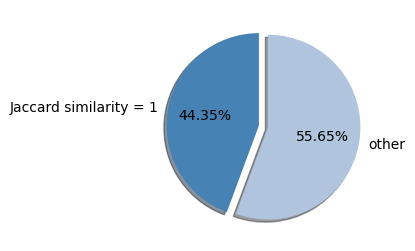

In [13]:
import sys
sys.path.append("..")
from util.process import cal_entities,cal_same_entities
import matplotlib.pyplot as plt
import re
import numpy as np
print(cal_entities(entity_sim_examples),"entities were annotated in the dateset")

one = cal_entities(entity_sim_examples)
zero = 28631 - one
params = {
    'figure.figsize': '15, 3'
}
plt.rcParams.update(params)  

plt.figure()
plt.pie(x=[one,zero],
        labels=['Jaccard similarity = 1','other'],
        explode=(0, 0.1),
        autopct='%.2f%%',
        colors=["#4682B4", "#B0C4DE"],
        shadow=True, startangle=90
       )
plt.show()

In [14]:

# same_count,same_list = cal_same_entities(entity_sim_examples)
# print("Entities with unanimous votes:",same_count)

# with open('./data/sim_entity_unanimous.json', 'wt') as f:
#     print(json.dumps(same_list), file=f)

# params = {
#     'figure.figsize': '15, 3'
# }
# plt.rcParams.update(params)  

# plt.figure()
# plt.pie(x=[same_count,28631-same_count],
#         labels=['annotated by all ','remaining'],
#         explode=(0, 0.1),
#         autopct='%.2f%%',
#         colors=["#4682B4", "#B0C4DE"],
#         shadow=True, startangle=90
#        )
# plt.show()

In [15]:
# from process import cal_inconsistency,proess_data,cal_inaccuracy_entity

# proess_data(entity_sim_examples)

# with open('./data/sim_after_vote.json', 'wt') as f:
#     print(json.dumps(entity_sim_examples), file=f)